Download links:
- French NFI : https://inventaire-forestier.ign.fr/dataifn/ 

# Method :

1. Clean TABLES by looking only at visible trees from satellite imagery. 
2. Aggregate tree level variables at the plot level. For one variable, the most common value among the trees of the plots is kept (if this value is shared by more than 25% of the trees). 
3. Plots are classified according to the variables values. The classification is done by a weighted score system that takes into account two types of variables : High and low probabilities of being a sign of specific forest disturbance. 

In [5]:
#loading data
import pandas as pd

col_placette = ['IDP', 'VISITE','DC', 'XL', 'YL','DPYR', 'ANPYR', 'NINCID', 'INCID', 'GEST', 'ELAG', 'PRELEV5', 'DEF5']
col_arbre = ['IDP', 'A', 'LIB', 'AGE', 'CAMPAGNE', 'ACCI', 'DATEMORT', 'VEGET', 'VEGET5', 'SFCOEUR', 'SFDORGE', 'SFGUI', 'MORTB', 'HTOT', 'W']
col_eco = ['IDP', 'OBSVEGET', 'HUMUS', 'DATEECO']
col_couvert = ['IDP', 'ESPAR_C', 'P1525', 'P7ARES']
df_placette = pd.read_csv('../data/NFI/FR/PLACETTE.csv', sep=';')[col_placette]
df_arbre = pd.read_csv('../data/NFI/FR/ARBRE.csv', sep=';')[col_arbre]
df_eco = pd.read_csv('../data/NFI/FR/ECOLOGIE.csv', sep=';')[col_eco]
df_couvert = pd.read_csv('../data/NFI/FR/COUVERT.csv', sep=';')[col_couvert]


/var/folders/1c/h8t9_vd53gsgz_wm9kswm8wm0000gp/T/ipykernel_4986/4253391451.py:8: DtypeWarning: Columns (15,16,18,24,25,26,27,28,32,36,39,40,41,42,44,49,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_placette = pd.read_csv('../data/NFI/FR/PLACETTE.csv', sep=';')[col_placette]
/var/folders/1c/h8t9_vd53gsgz_wm9kswm8wm0000gp/T/ipykernel_4986/4253391451.py:9: DtypeWarning: Columns (4,5,9,14,21,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_arbre = pd.read_csv('../data/NFI/FR/ARBRE.csv', sep=';')[col_arbre]
/var/folders/1c/h8t9_vd53gsgz_wm9kswm8wm0000gp/T/ipykernel_4986/4253391451.py:10: DtypeWarning: Columns (15,20,21,22,25,26,27,30,31,32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eco = pd.read_csv('../data/NFI/FR/ECOLOGIE.csv', sep=';')[col_eco]


In [9]:
couvert_table = pd.read_csv('../data/NFI/FR/espar-cdref13.csv', sep=';')

In [22]:
couvert_table['lib_espar'].unique()

array(['Sapin pectiné', 'Mimosa', 'Érable champêtre',
       'Érable de Montpellier', 'Érable negundo',
       "Érable à feuilles d'obier", 'Érable plane', 'Érable sycomore',
       "Marronnier d'Inde", 'Ailante', 'Aulne de Corse',
       'Aulne glutineux', 'Aulne blanc', 'Aulne vert', 'Arbousier',
       'Bouleau pubescent', 'Bouleau verruqueux', 'Mûrier de Chine',
       'Buis', 'Charme', 'Châtaignier', 'Catalpa', 'Micocoulier',
       'Caroubier', 'Arbre de Judée', 'Oranger', 'Cédratier',
       'Mandarinier', 'Cornouiller mâle', 'Noisetier coudrier',
       'Aubépine azérolier', 'Aubépine monogyne', 'Aubépine épineuse',
       'Cyprès de Provence', 'Cognassier', 'Kaki', 'Plaqueminier',
       'Olivier de Bohême', 'Bruyère arborescente', "Fusain d'Europe",
       'Hêtre', 'Figuier de Carie', "Frêne d'Amérique", 'Frêne commun',
       'Frêne à fleur', 'Frêne oxyphylle', 'Houx', 'Noyer commun',
       'Genévrier commun', 'Genévrier oxycèdre', 'Genévrier thurifère',
       'Cytise aubo

In [47]:

translation_en = {
    'Sapin pectiné': 'Silver Fir',
    'Mimosa': 'Mimosa',
    'Érable champêtre': 'Field Maple',
    'Érable de Montpellier': 'Montpellier Maple',
    'Érable negundo': 'Box Elder',
    "Érable à feuilles d'obier": 'Maple with Viburnum leaves',
    'Érable plane': 'Norway Maple',
    'Érable sycomore': 'Sycamore Maple',
    "Marronnier d'Inde": 'Horse Chestnut',
    'Ailante': 'Tree of Heaven',
    'Aulne de Corse': 'Corsican Alder',
    'Aulne glutineux': 'Black Alder',
    'Aulne blanc': 'White Alder',
    'Aulne vert': 'Green Alder',
    'Arbousier': 'Strawberry Tree',
    'Bouleau pubescent': 'Downy Birch',
    'Bouleau verruqueux': 'Silver Birch',
    'Mûrier de Chine': 'Chinese Mulberry',
    'Buis': 'Boxwood',
    'Charme': 'Hornbeam',
    'Châtaignier': 'Chestnut',
    'Catalpa': 'Catalpa',
    'Micocoulier': 'Hackberry',
    'Caroubier': 'Carob',
    'Arbre de Judée': 'Judas Tree',
    'Oranger': 'Orange Tree',
    'Cédratier': 'Citron Tree',
    'Mandarinier': 'Mandarin Tree',
    'Cornouiller mâle': 'Dogwood',
    'Noisetier coudrier': 'Hazel',
    'Aubépine azérolier': 'Azarole Hawthorn',
    'Aubépine monogyne': 'Common Hawthorn',
    'Aubépine épineuse': 'Spiny Hawthorn',
    'Cyprès de Provence': 'Cypress of Provence',
    'Cognassier': 'Quince',
    'Kaki': 'Persimmon',
    'Plaqueminier': 'Persimmon',
    'Olivier de Bohême': 'Bohemian Olive',
    'Bruyère arborescente': 'Tree Heath',
    "Fusain d'Europe": 'European Spindle',
    'Hêtre': 'Beech',
    'Figuier de Carie': 'Fig of Caria',
    "Frêne d'Amérique": 'American Ash',
    'Frêne commun': 'European Ash',
    'Frêne à fleur': 'Flowering Ash',
    'Frêne oxyphylle': 'Narrow-leaved Ash',
    'Houx': 'Holly',
    'Noyer commun': 'Common Walnut',
    'Genévrier commun': 'Common Juniper',
    'Genévrier oxycèdre': 'Prickly Juniper',
    'Genévrier thurifère': 'Incense Juniper',
    'Cytise aubour': 'Laburnum anagyroides',
    'Cytise des alpes': 'Alpine Laburnum',
    "Mélèze d'Europe": 'European Larch',
    'Laurier noble': 'Bay Laurel',
    'Tulipier de Virginie': 'Tulip Tree',
    'Mûrier blanc': 'White Mulberry',
    'Mûrier noir': 'Black Mulberry',
    "Olivier d'Europe": 'European Olive',
    'Charme houblon': 'Hop Hornbeam',
    'Paulownia': 'Paulownia',
    'Filaire à feuilles étroites': 'Narrow-leaved Oleaster',
    'Filaire à feuilles larges': 'Broad-leaved Oleaster',
    'Épicéa commun': 'Norway Spruce',
    'Pin cembro': 'Swiss Pine',
    "Pin d'Alep": 'Aleppo Pine',
    'Pin laricio de Corse': 'Corsican Pine',
    'Pin à crochets': 'Hooked Pine',
    'Pin maritime': 'Maritime Pine',
    'Pin parasol': 'Stone Pine',
    'Pin sylvestre': 'Scots Pine',
    'Pin Weymouth': 'Weymouth Pine',
    "Poirier à feuilles d'amandier": 'Pear with Almond leaves',
    'Poirier commun': 'Common Pear',
    'Pommier sauvage': 'Wild Apple',
    'Poirier neigeux': 'Snow Pear',
    'Pistachier lentisque': 'Mastic Tree',
    'Pistachier térébinthe': 'Turpentine Tree',
    'Pistachier vrai': 'True Pistachio',
    "Platane à feuilles d'érable": 'Maple-leaved Plane',
    "Platane d'Occident": 'Western Plane',
    "Platane d'Orient": 'Oriental Plane',
    'Peuplier blanc': 'White Poplar',
    'Peuplier grisard': 'Grey Poplar',
    'Peuplier noir': 'Black Poplar',
    'Tremble': 'Aspen',
    'Amandier': 'Almond',
    'Abricotier': 'Apricot',
    'Merisier': 'Wild Cherry',
    'Prunier de Briançon': "Briançon Plum",
    'Prune-cerise': 'Cherry Plum',
    'Cerisier': 'Cherry',
    'Prunier domestique': 'Domestic Plum',
    'Cerisier de Sainte Lucie': "Saint Lucia Cherry",
    'Cerisier à grappes': 'Cluster Cherry',
    'Cerisier tardif': 'Late Cherry',
    'Prunelier': 'Blackthorn',
    'Chêne chevelu': 'Hairy Oak',
    'Chêne écarlate': 'Scarlet Oak',
    'Chêne vert': 'Holly Oak',
    'Chêne pubescent': 'Downy Oak',
    'Chêne des marais': 'Swamp Oak',
    'Chêne pédonculé': 'Pedunculate Oak',
    'Chêne faux-liège': 'False-cork Oak',
    'Chêne rouge': 'Red Oak',
    'Chêne sessile': 'Sessile Oak',
    'Chêne-liège': 'Cork Oak',
    'Chêne tauzin': 'Tauzin Oak',
    'Nerprun alaterne': 'Italian Buckthorn',
    'Nerprun des Alpes': 'Alpine Buckthorn',
    'Nerprun purgatif': 'Purging Buckthorn',
    'Bourdaine': 'Alder Buckthorn',
    'Sumac de Virginie': 'Virginia Sumac',
    'Vernis vrai': 'True Lacquer',
    'Robinier faux acacia': 'Black Locust',
    'Saule blanc': 'White Willow',
    'Saule marsault': 'Goat Willow',
    'Saule cendré': 'Ash-leaved Willow',
    'Saule faux daphné': 'False Daphne Willow',
    'Saule cassant': 'Brittle Willow',
    'Saule drapé': 'Draped Willow',
    'Saule pédicellé': 'Pedicelled Willow',
    'Saule à cinq étamines': 'Five-stamen Willow',
    'Saule rouge': 'Red Willow',
    'Saule à trois étamines': 'Three-stamen Willow',
    'Saule des vanniers': 'Basket Willow',
    'Sureau noir': 'Black Elder',
    'Sureau rouge': 'Red Elder',
    'Alisier blanc': 'White Serviceberry',
    'Sorbier des oiseleurs': 'Rowan',
    'Cormier': 'Service Tree',
    'Sorbier de Finlande': 'Finnish Rowan',
    'Alisier de Fontainebleau': 'Fontainebleau Serviceberry',
    'Alisier de Mougeot': 'Mougeot Serviceberry',
    'Sorbier de Suède': 'Swedish Rowan',
    'Alisier torminal': 'Wild Service Tree',
    "Tamaris d'Afrique": 'African Tamarisk',
    'Tamaris de France': 'French Tamarisk',
    'If': 'Yew',
    'Thuya du Canada': 'Canadian Arborvitae',
    "Tilleul d'Amérique du Nord": 'North American Lime',
    'Tilleul à petites feuilles': 'Small-leaved Lime',
    'Tilleul vert': 'Green Lime',
    'Tilleul à grandes feuilles': 'Large-leaved Lime',
    'Tilleul argenté': 'Silver Lime',
    'Tilleul de Hollande': 'Dutch Lime',
    'Oranger des Osages': 'Osage Orange',
    'Orme champêtre': 'Field Elm',
    'Orme lisse': 'Smooth Elm',
    'Orme de montagne': 'Mountain Elm',
    'Cyprès de Lambert': 'Lambert Cypress',
    "Cèdre de l'Atlas": 'Atlas Cedar',
    'Cèdre de Chypre': 'Cyprus Cedar',
    'Cèdre du Liban': 'Cedar of Lebanon',
    "Cèdre de l'Himalaya": 'Himalayan Cedar',
    "Pin noir d'Autriche": 'Austrian Black Pine',
    'Pin laricio de Calabre': 'Calabrian Pine',
    'Pin de Salzmann': 'Salzmann Pine',
    'Pin de Monterey': 'Monterey Pine',
    'Douglas': 'Douglas Fir',
    "Cyprès de l'Arizona": 'Arizona Cypress',
    'Sapin de Nordmann': 'Nordmann Fir',
    "Sapin d'Andalousie": 'Andalusian Fir',
    'Sapin de Vancouver': 'Vancouver Fir',
    'Épicéa de Sitka': 'Sitka Spruce',
    'Épicéa omorika': 'Serbian Spruce',
    'Mélèze du Japon': 'Japanese Larch',
    'Thuya géant': 'Giant Arborvitae',
    'Cyprès de Lawson': 'Lawson Cypress',
    'Sapin de Céphalonie': 'Cephalonian Fir',
    'Pin brutia (ou) eldarica': 'Brutia Pine (or) Eldarica Pine',
    'Sapin de Turquie': 'Turkish Fir',
    'Sapin du Colorado': 'Colorado Fir',
    'Sapin de Cilicie': 'Cilician Fir',
    'Noyer noir': 'Black Walnut',
    'Liquidambar': 'Sweetgum',
    'Pin de Murray': 'Murray Pine',
    'Séquoia toujours vert': 'Evergreen Sequoia',
    'Séquoia géant': 'Giant Sequoia',
    'Cyprès chauve': 'Bald Cypress',
    'Tsuga heterophylla': 'Western Hemlock',
    'Cryptomère du Japon': 'Japanese Cryptomeria',
    'Poirier à feuilles en cœur': 'Heart-leaved Pear',
    'Saule roux': 'Rusty Willow',
    'Filao': 'Filao Tree',
    'Pin mugo': 'Mountain Pine',
    'Tsuga du Canada': 'Canadian Hemlock',
    "Pin à l'encens et hybrides": 'Frankincense Pine and hybrids',
    'Sapin noble': 'Noble Fir',
    'Mélèze hybride': 'Hybrid Larch',
    'Peuplier cultivé': 'Cultivated Poplar',
    'Eucalyptus (genre)': 'Eucalyptus (genus)'
}


dict_code_espar_en = {y:translation_en[str(x)] if x in translation_en.keys() else None for x,y in zip(*couvert_table[['lib_espar', '// espar']].to_dict('list').values())}

In [48]:
import numpy as np
np.unique([x.split(' ')[-1] for x in translation_en.values()])

array(['(genus)', 'Alder', 'Almond', 'Apple', 'Apricot', 'Arborvitae',
       'Ash', 'Aspen', 'Beech', 'Birch', 'Blackthorn', 'Boxwood',
       'Buckthorn', 'Caria', 'Carob', 'Catalpa', 'Cedar', 'Cherry',
       'Chestnut', 'Cryptomeria', 'Cypress', 'Dogwood', 'Elder', 'Elm',
       'Fir', 'Hackberry', 'Hawthorn', 'Hazel', 'Heath', 'Heaven',
       'Hemlock', 'Holly', 'Hornbeam', 'Juniper', 'Laburnum', 'Lacquer',
       'Larch', 'Laurel', 'Lebanon', 'Lime', 'Locust', 'Maple', 'Mimosa',
       'Mulberry', 'Oak', 'Oleaster', 'Olive', 'Orange', 'Paulownia',
       'Pear', 'Persimmon', 'Pine', 'Pistachio', 'Plane', 'Plum',
       'Poplar', 'Provence', 'Quince', 'Rowan', 'Sequoia', 'Serviceberry',
       'Spindle', 'Spruce', 'Sumac', 'Sweetgum', 'Tamarisk', 'Tree',
       'Walnut', 'Willow', 'Yew', 'anagyroides', 'hybrids', 'leaves'],
      dtype='<U12')

In [40]:
tree_classification = {
    'Broadleaf': [
        'Alder', 'Almond', 'Apple', 'Apricot', 'Ash', 'Aspen', 'Beech', 'Birch', 'Blackthorn', 
        'Boxwood', 'Buckthorn', 'Caria', 'Carob', 'Catalpa', 'Cherry', 'Chestnut', 'Dogwood', 
        'Elder', 'Elm', 'Hackberry', 'Hawthorn', 'Hazel', 'Heath', 'Heaven', 'Holly', 
        'Hornbeam', 'Laburnum', 'Laurel', 'Lebanon', 'Lime', 'Locust', 'Maple', 'Mimosa', 
        'Mulberry', 'Oak', 'Oleaster', 'Olive', 'Orange', 'Paulownia', 'Pear', 'Persimmon', 
        'Pistachio', 'Plane', 'Plum', 'Poplar', 'Provence', 'Quince', 'Rowan', 'Serviceberry', 
        'Spindle', 'Sumac', 'Sweetgum', 'Tamarisk', 'Tree', 'Walnut', 'Willow', 'anagyroides', 
        'leaves'
    ],
    'Conifer': [
        'Arborvitae', 'Cedar', 'Cryptomeria', 'Cypress', 'Fir', 'Hemlock', 'Juniper', 'Larch', 
        'Pine', 'Sequoia', 'Spruce', 'Yew'
    ],
    'Mixed': [
        'hybrids'  # The term "hybrids" could imply a mix of species, further details would provide clarity
    ]
}

def get_tree_type(x):
    if type(x) == str:
        for k,v in tree_classification.items():
            for y in x.split(' '):
                if y in v:
                    return k
    return np.nan

In [62]:
#fix because there is 03, 04, etc  in the COUVERT.csv but just 3, 4 in the table
# df_couvert['ESPAR_C'] = df_couvert['ESPAR_C'].apply(lambda x: x.lstrip('0') if len(x) == 2 else x)
df_couvert['essence'] = df_couvert['ESPAR_C'].apply(lambda x: dict_code_espar_en[x] if x in dict_code_espar_en.keys() else np.nan)

df_couvert['tree_type'] = df_couvert['essence'].map(get_tree_type)

# Cleaning tables

- arbre : Height above 5m and canopy with full access to light. 
- placette : RAS  
- eco : RAS 

In [65]:
df_arbre_clean = df_arbre[ (df_arbre['LIB'] > 1) & ((df_arbre['HTOT'] > 5) | (df_arbre['HTOT'].isna())) ]

# Join 

The three tables are joined on 'IDP'. 
Then variables at the tree level are aggregated at the plot level. If a variable has the same value on more than 25% of the trees of one plot, then this value is reported to the plot level. Else, the variable is set to NaN. 

In [66]:
#merging all data
import functools as ft
dfs = [df_placette, df_arbre_clean, df_eco, df_couvert]
df = ft.reduce(lambda left, right: pd.merge(left, right, on='IDP'), dfs)
df

,IDP,VISITE,DC,XL,YL,DPYR,ANPYR,NINCID,INCID,GEST,...,HTOT,W,OBSVEGET,HUMUS,DATEECO,ESPAR_C,P1525,P7ARES,essence,tree_type
0,100007,1,NaN,633045.827163,6.685222e+06,NaN,NaN,NaN,NaN,NaN,...,25.4,28.281855,NaN,22,2006-06-16,3,NaN,NaN,Sessile Oak,Broadleaf
1,100007,1,NaN,633045.827163,6.685222e+06,NaN,NaN,NaN,NaN,NaN,...,25.4,28.281855,NaN,22,2006-06-16,3,0.0,NaN,Sessile Oak,Broadleaf
2,100007,1,NaN,633045.827163,6.685222e+06,NaN,NaN,NaN,NaN,NaN,...,25.4,28.281855,NaN,22,2006-06-16,9,NaN,NaN,Beech,Broadleaf
3,100007,1,NaN,633045.827163,6.685222e+06,NaN,NaN,NaN,NaN,NaN,...,25.4,28.281855,NaN,22,2006-06-16,9,0.0,NaN,Beech,Broadleaf
4,100007,1,NaN,633045.827163,6.685222e+06,NaN,NaN,NaN,NaN,NaN,...,25.4,28.281855,NaN,22,2006-06-16,41,0.0,NaN,Wild Service Tree,Broadleaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432148,1654936,1,0.0,493218.208358,6.693381e+06,NaN,NaN,0.0,NaN,1.0,...,17.2,39.290100,0.0,21,2021-05-11,3,NaN,1.0,Sessile Oak,Broadleaf
9432149,1654936,1,0.0,493218.208358,6.693381e+06,NaN,NaN,0.0,NaN,1.0,...,17.2,39.290100,0.0,21,2021-05-11,10,NaN,1.0,Chestnut,Broadleaf
9432150,1654936,1,0.0,493218.208358,6.693381e+06,NaN,NaN,0.0,NaN,1.0,...,17.2,39.290100,0.0,21,2021-05-11,12V,NaN,0.0,Silver Birch,Broadleaf
9432151,1654936,1,0.0,493218.208358,6.693381e+06,NaN,NaN,0.0,NaN,1.0,...,17.2,39.290100,0.0,21,2021-05-11,41,NaN,0.0,Wild Service Tree,Broadleaf


In [67]:
import numpy as np
from collections import Counter

def most_common(a):
    n = len(a)
    lvalue = [(a, b/n) for a,b in Counter(a).most_common() if a==a]
    out = None
    
    if len(lvalue) > 0: #if more than 25% of the trees have a value 
        if lvalue[0][1] > 0.25:
            out = lvalue[0][0]
        else :
            out = np.nan
        # else:
        #     out = [v for (v,p) in lvalue if p>0.25]
        
    return out 

groups = df.groupby(['IDP', 'CAMPAGNE'])

dfgb = groups[['VEGET', 'VEGET5', 'ACCI', 'SFCOEUR', 'SFDORGE', 'SFGUI', 'MORTB', 'DATEMORT']].agg(most_common)
dfgb['HAVG'] = groups['HTOT'].mean() 
dfgb.reset_index(inplace=True)
col = ['DPYR', 'ANPYR', 'NINCID', 'INCID', 'GEST', 'ELAG', 'PRELEV5', 'DEF5', 'OBSVEGET', 'DC','HUMUS', 'DATEECO', 'essence', 'tree_type']
dfgb[col] = groups[col].first().reset_index()[col]
dfgb['XL'] = groups.XL.mean().reset_index()['XL']
dfgb['YL'] = groups.YL.mean().reset_index()['YL']

In [72]:
#dataframe to geodataframe
import geopandas as gpd
gdf = gpd.GeoDataFrame(dfgb, geometry=gpd.points_from_xy(dfgb.XL, dfgb.YL, crs='epsg:2154'), crs='epsg:2154')

# Classification 

- Fire :
- Storm : also landslide and hail 
- Biotic-dieback : mainly insect and fungi attack leaeding to dieback 
- Biotic-mortality : mainly insect and fungi attack leading to mortality
- Drought : 
- Tree-logging : selective logging or clear cut 

In [73]:
from datetime import datetime

classification = ['Fire', 'Storm', 'Biotic-dieback', 'Biotic-mortality', 'Drought', 'Tree-logging'] 

#value to str
classification_hp = {
    'Fire': {'NINCID':1},
    'Storm': {'NINCID':(3,4)},
    'Biotic-dieback': {},
    'Biotic-mortality': {'NINCID':2},
    'Drought': {'NINCID':2},
    'Tree-logging': {'DC':(1,2,3,4,5,6,7,8,9), 'PRELEV5':2}
}

classification_lp = {
    'Fire': {'VEGET':(5, 'C'), 'ACCI':4, 'OBSVEGET':1},
    'Storm': {'VEGET':('A', 'C', 'T', 2, 1), 'ACCI':(1,2,3), 'OBSVEGET':2},
    'Biotic-dieback': { 'NINCID':5, 'OBSVEGET':6, 'MORTB':(1,2,3,4), 'DPYR':(1,2), 'SFGUI':(1,2,3), 'SFCOEUR':1, 'SFDORGE':(1,2)},
    'Biotic-mortality': {'OBSVEGET':6, 'VEGET':(5, 'M'), 'VEGET5':(5, 'M')},
    'Drought': {'HUMUS':42, 'OBSVEGET':6, 'MORTB':(1,2,3,4)},
    'Tree-logging': {'OBSVEGET':(2,3), 'VEGET':(6,7), 'VEGET5':(6,7), 'GEST':2, 'ELAG':1, 'PRELEV5':1, 'DEF5':(1,2,3,4,5)}
}


classification_date = {
    'Fire': ['DATEMORT', 'CAMPAGNE', 'DATEECO'],
    'Storm': ['DATEMORT', 'CAMPAGNE', 'DATEECO'],
    'Biotic-dieback': ['ANPYR', 'CAMPAGNE'],
    'Biotic-mortality': ['DATEMORT', 'CAMPAGNE'],
    'Drought': ['CAMPAGNE', 'DATEECO'],
    'Tree-logging': ['CAMPAGNE']
}


def get_len(list, row):
    c  = 0
    for var in list:
        if not pd.isnull(row[var]):
            c += 1
    return c

def get_date(d):
    start_date, end_date = None, None
    
    if 'ANPYR' in d and float(d['ANPYR']) > 1985:
        year = int(float(d['ANPYR']))
        start_date = datetime(year=year, month=1, day=1)
        end_date = datetime(year=year, month=12, day=28)

    elif 'DATEMORT' in d:
        if d['DATEMORT'] == 1:
            start_date = datetime(year=d['CAMPAGNE'] - 5, month=1, day=1)
            end_date = datetime(year=d['CAMPAGNE'], month=12, day=28)

        elif d['DATEMORT'] == 2:
            start_date = None
            # start_date = datetime(year=d['CAMPAGNE'] - 10, month=12, day=28)
            end_date = datetime(year=d['CAMPAGNE'] - 5, month=12, day=28)
    
    elif 'CAMPAGNE' in d:
        start_date = None
        # start_date = datetime(year=d['CAMPAGNE'] - 5, month=1, day=1)
        end_date = datetime(year=d['CAMPAGNE'], month=12, day=28)

    elif 'DATEECO' in d:
        start_date = None
        # start_date = datetime(year=d['DATEECO'] - 5, month=1, day=1)
        end_date = datetime.strptime(d['DATEECO'], '%Y-%m-%d')

    return (start_date, end_date)


def get_class(row, print_=False):

    #score
    score = {c:0 for c in classification}
    score_pond = {c:3 * get_len(classification_hp[c], row) + get_len(classification_lp[c], row)  for c in classification}
    score_pond = {c: score_pond[c] if score_pond[c] > 0 else 1e3 for c in classification }

    for c in classification:
        for k,v in classification_hp[c].items():
            if isinstance(v, tuple):
                if row[k] in v:
                    score[c] += 3
            else:
                if row[k] == v:
                    score[c] += 3

        for k,v in classification_lp[c].items():
            if isinstance(v, tuple):
                if row[k] in v:
                    score[c] += 1
            else:
                if row[k] == v:
                    score[c] += 1

    if print_:
        print('score: ', score)
        print('ponderation: ', score_pond)

    score = {k:v/score_pond[k] for k,v in score.items()}
    class_ = max(score, key=score.get)

    if print_:
        print('score pondéré: ', score)
    
    #visibility
    vis = row.INCID

    #date
    date_var = {c:row[c] for c in classification_date[class_] if not pd.isnull(row[c])}
    d1, d2 = get_date(date_var)

    p = score[class_]
    if p == 0:
        class_ = np.nan

    return class_, p, vis, d1, d2

In [74]:
index = 57889
print(gdf.iloc[index])
get_class(gdf.iloc[index], print_=True)

IDP                                               968030
CAMPAGNE                                            2014
VEGET                                                  0
VEGET5                                              None
ACCI                                                 0.0
SFCOEUR                                              NaN
SFDORGE                                              NaN
SFGUI                                                0.0
MORTB                                                0.0
DATEMORT                                             NaN
HAVG                                               12.58
DPYR                                                 NaN
ANPYR                                                NaN
NINCID                                               0.0
INCID                                                0.0
GEST                                                 0.0
ELAG                                                 NaN
PRELEV5                        

(nan, 0.0, 0.0, None, datetime.datetime(2014, 12, 28, 0, 0))

In [75]:
col = ['class', 'probability', 'intensity', 'start_date', 'end_date'] 
gdf[col] = gdf.apply(get_class, axis=1, result_type='expand').reset_index().drop(columns='index')

In [77]:
gdf

,IDP,CAMPAGNE,VEGET,VEGET5,ACCI,SFCOEUR,SFDORGE,SFGUI,MORTB,DATEMORT,...,XL,YL,essence,tree_type,geometry,class,probability,intensity,start_date,end_date
0,100007,2006,0,None,NaN,NaN,NaN,NaN,0.0,NaN,...,6.330458e+05,6.685222e+06,Sessile Oak,Broadleaf,POINT (633045.827 6685221.912),Tree-logging,0.200000,0.0,NaT,2006-12-28
1,100051,2006,0,None,NaN,NaN,NaN,NaN,0.0,NaN,...,8.205513e+05,6.643667e+06,Pedunculate Oak,Broadleaf,POINT (820551.338 6643666.599),NaN,0.000000,0.0,NaT,2006-12-28
2,100061,2006,0,None,NaN,NaN,NaN,NaN,0.0,NaN,...,5.307970e+05,6.646105e+06,Downy Oak,Broadleaf,POINT (530797.019 6646105.331),NaN,0.000000,0.0,NaT,2006-12-28
3,100084,2006,0,None,NaN,NaN,NaN,NaN,0.0,NaN,...,7.014376e+05,6.500797e+06,Pedunculate Oak,Broadleaf,POINT (701437.639 6500797.153),NaN,0.000000,0.0,NaT,2006-12-28
4,100090,2006,0,None,NaN,NaN,NaN,NaN,0.0,NaN,...,3.583169e+05,6.815407e+06,Pedunculate Oak,Broadleaf,POINT (358316.927 6815407.058),Tree-logging,0.200000,0.0,NaT,2006-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97498,1654905,2021,0,None,0.0,NaN,NaN,NaN,NaN,NaN,...,8.680444e+05,6.822133e+06,Pedunculate Oak,Broadleaf,POINT (868044.432 6822132.907),Tree-logging,0.666667,1.0,NaT,2021-12-28
97499,1654911,2021,0,None,0.0,0.0,NaN,0.0,0,NaN,...,8.846937e+05,6.666100e+06,Sessile Oak,Broadleaf,POINT (884693.742 6666100.428),Storm,0.500000,1.0,NaT,2021-12-28
97500,1654915,2021,0,None,0.0,NaN,NaN,0.0,0,NaN,...,1.219914e+06,6.153678e+06,Holly Oak,Broadleaf,POINT (1219913.875 6153678.234),NaN,0.000000,NaN,NaT,2021-12-28
97501,1654932,2021,0,None,0.0,NaN,NaN,NaN,None,NaN,...,7.479120e+05,6.325570e+06,Chestnut,Broadleaf,POINT (747911.995 6325570.426),Tree-logging,0.166667,NaN,NaT,2021-12-28


In [81]:
gdf[['IDP', 'CAMPAGNE', 'geometry'] + col].to_crs('epsg:4326').to_parquet('../data/NFI_2003-2021_EPSG4326_FR.parquet')


# Graphs & Stats

In [78]:
gplot = gdf[ (gdf['probability'] >= 0.5) ]
gplot = gplot[ ~((gplot['class'] == 'Tree-logging')&(gplot['intensity']==0)) ]

In [79]:
gplot['class'].value_counts()

class
Tree-logging        6630
Storm               1804
Biotic-dieback      1798
Biotic-mortality    1574
Drought              570
Fire                 127
Name: count, dtype: int64

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


ValueError: could not broadcast input array from shape (512,512,4) into shape (256,256,4)

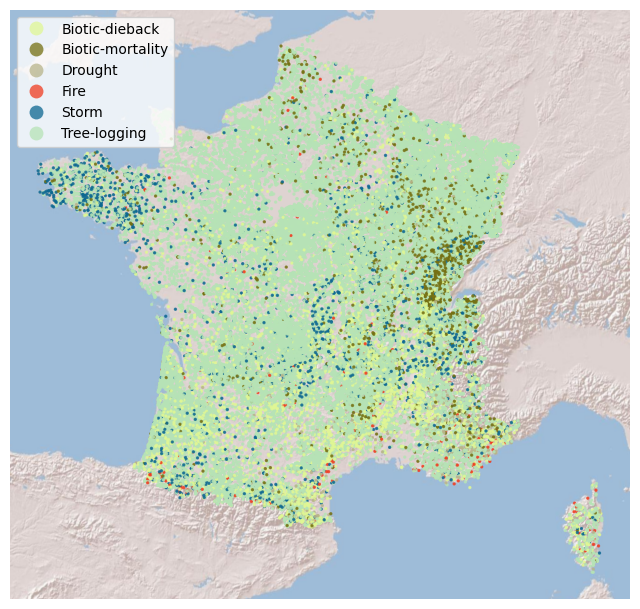

In [80]:
#custom cmap with [yellow, yellowbrown, light brown, red, dark bluegreen, grey]
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

colors = ['#e0f794', '#757012', '#b8b48a', '#f03b20', '#0c6791', '#b6e3b6']
cmap = ListedColormap(colors)


import contextily as cx 
col = ['class', 'probability', 'intensity', 'start_date', 'end_date', 'essence', 'tree_type'] 
gdf.dropna(subset=['class'], inplace=True)
ax = gdf[col+['geometry']].plot(column='class', figsize=(8,8), legend=True, alpha=0.75, markersize=2, cmap=cmap)
ax.set_axis_off()
source = cx.providers.Esri.WorldShadedRelief
cx.add_basemap(ax, crs=gplot.crs, source=source, attribution=False)
#add tonelite map
cx.add_basemap(ax, crs=gplot.crs, zoom=6, source=cx.providers.Stamen.TonerLines, attribution=False, alpha=0.5)


In [142]:
#fig save with dpi=200

ax.get_figure().savefig('../figures/classification_FI.png', dpi=200, bbox_inches='tight')

## Cleaning essence

In [1]:
import geopandas as gpd

nfi = gpd.read_parquet('../data/processed_datasets/NFI_2003-2021_EPSG4326_FR.parquet')

In [2]:
nfi

,IDP,CAMPAGNE,geometry,class,probability,intensity,start_date,end_date
1,23,2005,POINT (7.14519 48.80355),Tree-logging,0.200000,0.0,NaT,2005-12-28
3,41,2005,POINT (6.24338 44.06373),Tree-logging,0.200000,0.0,NaT,2005-12-28
18,168,2005,POINT (3.17476 47.45901),Tree-logging,0.375000,0.0,NaT,2005-12-28
20,172,2005,POINT (0.91553 45.63573),Tree-logging,0.200000,0.0,NaT,2005-12-28
22,179,2005,POINT (-0.76264 44.44959),Tree-logging,0.444444,4.0,NaT,2005-12-28
...,...,...,...,...,...,...,...,...
104080,1654854,2021,POINT (6.94942 49.05437),Tree-logging,0.166667,NaN,NaT,2021-12-28
104082,1654890,2021,POINT (0.87099 46.34603),Tree-logging,0.142857,NaN,NaT,2021-12-28
104084,1654905,2021,POINT (5.27403 48.47768),Tree-logging,0.666667,1.0,NaT,2021-12-28
104085,1654911,2021,POINT (5.43413 47.06953),Storm,0.500000,1.0,NaT,2021-12-28


## Histograms

In [74]:
gdf[['IDP', 'CAMPAGNE', 'geometry'] + col].to_crs('epsg:4326').to_parquet('../data/NFI_2003-2021_EPSG4326_FR.parquet')


# Simplified

In [1]:
import geopandas as gpd

epsg = 'epsg:2154'
nfi = gpd.read_parquet('../data/processed_datasets/NFI_2003-2021_EPSG4326_FR.parquet').to_crs(epsg)

In [2]:
nfi = nfi[ (nfi['probability'] >= 0.1) ]
nfi = nfi[ ~((nfi['class'] == 'Tree-logging')&(nfi['intensity']==0)) ]

#correct start_date
from datetime import timedelta
import pandas as pd
def get_start_date(row):
    if not pd.isnull(row['start_date']):
        return row['start_date']
    else:
        return row['end_date'] - timedelta(days=5*365.25)
    

nfi['start_date'] = nfi.apply(get_start_date, axis=1)

#keep col 
nfi_col = ['start_date', 'end_date', 'geometry', 'class', 'tree_type', 'essence']
nfi = nfi[nfi_col]

nfi.dropna(inplace=True)
nfi.drop_duplicates(inplace=True)

In [3]:
nfi.to_parquet('../data/processed_datasets/simplified_NFI_2003-2021_EPSG2154_FR.parquet')